In [107]:
!pip3 install opendatasets pandas numpy scikit-learn matplotlib seaborn --quiet

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)

In [109]:
raw_df = pd.read_csv("train.csv")
raw_df = raw_df.drop(columns=["loan_amount", "application_date", "state"])

In [110]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)

In [111]:
input_cols = list(raw_df.columns)[1:-1]
target_cols = 'target'

In [112]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

In [113]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()

In [114]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [115]:
numeric_cols

['age',
 'income',
 'dti_ratio',
 'credit_score',
 'employment_years',
 'loan_term',
 'existing_loans',
 'payment_history',
 'previous_defaults',
 'account_age_months']

In [116]:
categorical_cols

['gender',
 'education',
 'marital_status',
 'employment_status',
 'industry_sector',
 'loan_purpose',
 'urbanization',
 'application_channel']

In [117]:
train_inputs

,age,gender,education,marital_status,income,dti_ratio,credit_score,employment_status,employment_years,industry_sector,loan_term,loan_purpose,existing_loans,payment_history,previous_defaults,account_age_months,urbanization,application_channel
39087,29,M,Master,Single,37884709.0,38.1,747.0,Full-time,2.9,Government,60,Debt consolidation,1,83.4,1,37.0,Urban,In-person
30893,46,M,Other,Single,42842751.0,21.0,668.0,Full-time,7.1,Government,24,Debt consolidation,2,NaN,2,87.0,Urban,Online
45278,44,F,Associate,Married,32212155.0,20.5,764.0,Full-time,12.8,Government,36,Business,2,81.2,0,60.0,Urban,Online
16398,19,M,High School,Married,29336460.0,27.9,702.0,Unemployed,0.5,Manufacturing,48,Debt consolidation,2,78.6,0,12.0,Suburban,Online
13653,44,F,Bachelor,Single,72543793.0,7.9,729.0,Self-employed,10.7,Retail,48,Home improvement,2,75.0,0,62.0,Urban,Phone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,42,F,Bachelor,Single,63774665.0,7.4,621.0,Part-time,6.8,Healthcare,24,Major purchase,1,60.0,1,70.0,Rural,In-person
44732,59,F,Associate,Married,101770517.0,25.7,631.0,Full-time,25.6,Manufacturing,24,Major purchase,1,64.1,0,168.0,Urban,Online
38158,41,M,High School,Single,22293815.0,6.5,582.0,Full-time,13.6,Entertainment,48,Home improvement,1,57.0,1,46.0,Suburban,In-person
860,48,M,High School,Married,55704909.0,19.1,783.0,Unemployed,6.1,Other,36,Major purchase,2,90.2,0,134.0,Urban,Online


In [118]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
imputer.fit(train_df[numeric_cols])

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [120]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [121]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Model training

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
model = RandomForestClassifier(n_jobs=-1, random_state=42, max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

In [124]:
model.fit(X_train, train_targets)

RandomForestClassifier(min_samples_split=5, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [125]:
model.score(X_train, train_targets)

0.987375

In [126]:
model.score(X_test, test_targets)

0.8937

In [127]:
model.n_estimators

200

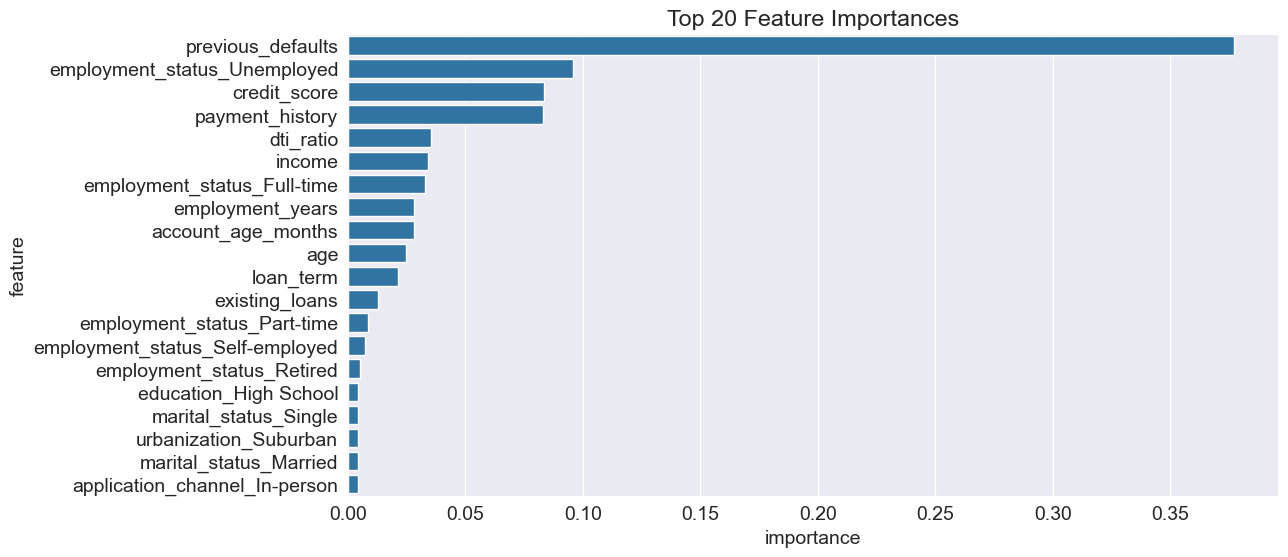

In [128]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df[:20], x="importance", y="feature")
plt.title("Top 20 Feature Importances")
plt.show()


In [129]:
importance_df

,feature,importance
8,previous_defaults,0.377052
26,employment_status_Unemployed,0.095838
3,credit_score,0.083583
7,payment_history,0.082794
2,dti_ratio,0.035242
1,income,0.033832
22,employment_status_Full-time,0.032844
4,employment_years,0.028217
9,account_age_months,0.028149
0,age,0.024876


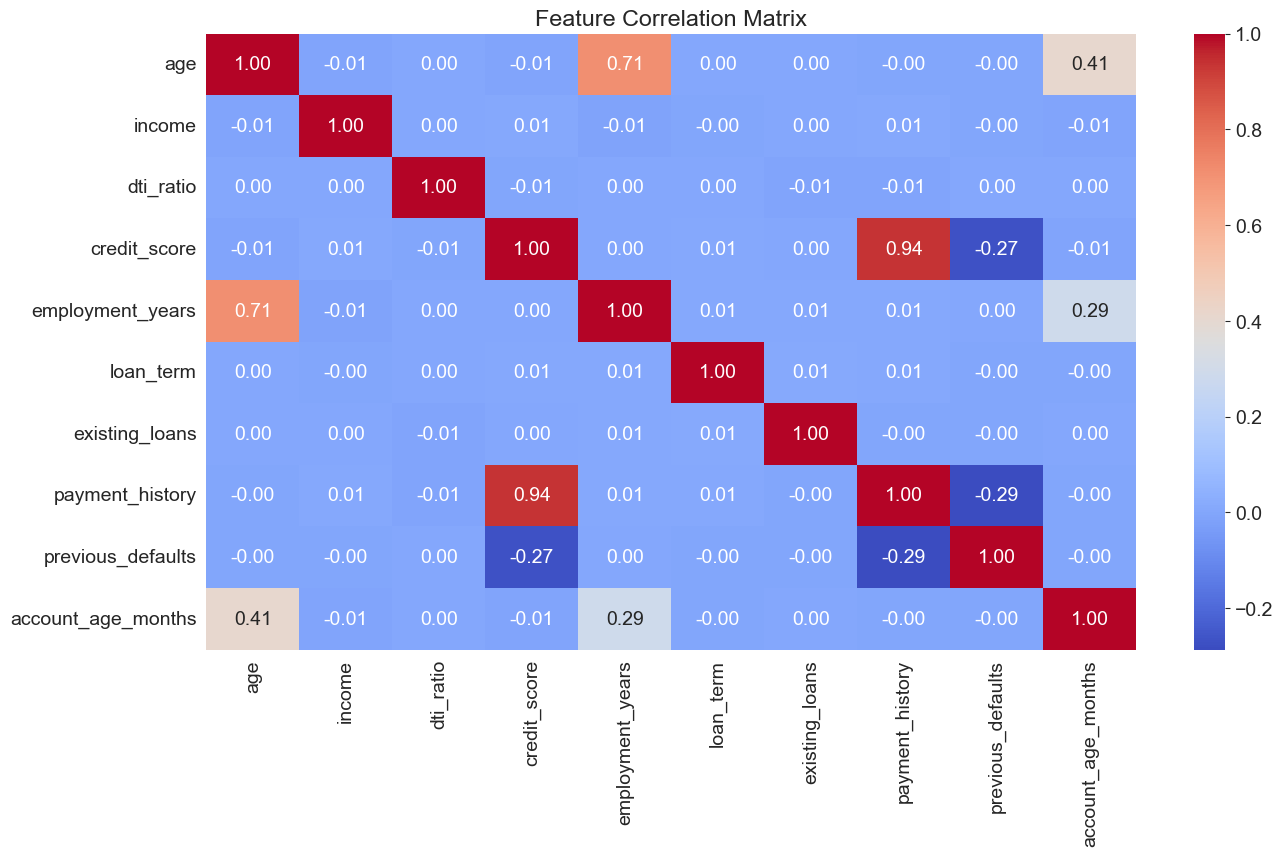

In [130]:
import seaborn as sns

correlation_matrix = raw_df[numeric_cols].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [131]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_test, test_targets)

In [132]:
low_importance_features = importance_df[importance_df['importance'] < 0.005]['feature'].tolist()
print("Features to Consider for Removal:", low_importance_features)

Features to Consider for Removal: ['education_High School', 'marital_status_Single', 'urbanization_Suburban', 'marital_status_Married', 'application_channel_In-person', 'loan_purpose_Debt consolidation', 'loan_purpose_Home improvement', 'education_Bachelor', 'gender_F', 'application_channel_Online', 'industry_sector_Retail', 'urbanization_Urban', 'loan_purpose_Major purchase', 'industry_sector_Technology', 'gender_M', 'industry_sector_Manufacturing', 'industry_sector_Healthcare', 'industry_sector_Finance', 'loan_purpose_Auto', 'urbanization_Rural', 'loan_purpose_Business', 'education_Associate', 'marital_status_Divorced', 'industry_sector_Government', 'loan_purpose_Education', 'industry_sector_Construction', 'industry_sector_nan', 'industry_sector_Education', 'industry_sector_Other', 'education_Master', 'education_Other', 'application_channel_Phone', 'marital_status_Widowed', 'industry_sector_Entertainment', 'loan_purpose_Medical', 'loan_purpose_Other', 'application_channel_Mail', 'loa

In [133]:
!pip install scikit-optimize

In [134]:
test_params(max_depth= 39, min_samples_leaf= 4, min_samples_split= 3, n_estimators= 97)

(0.933875, 0.8949)

In [135]:
test_params(max_depth= None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

(0.987375, 0.8937)

### Kaggle Test Dataset Output

In [136]:
kaggle_test_df = pd.read_csv("test.csv")
kaggle_test_df

,Id,age,gender,education,marital_status,income,dti_ratio,credit_score,employment_status,employment_years,industry_sector,loan_amount,loan_term,loan_purpose,existing_loans,payment_history,previous_defaults,account_age_months,state,urbanization,application_date,application_channel
0,21135,37,F,High School,Divorced,90896962.0,12.0,563.0,Full-time,8.1,Healthcare,100000,48,Major purchase,1,43.0,2,130.0,GA,Suburban,2023-12-23,Online
1,15443,56,M,Bachelor,Divorced,64828039.0,16.9,529.0,Unemployed,13.8,Healthcare,100000,36,Home improvement,1,48.0,0,143.0,NC,Suburban,2023-11-26,Phone
2,50774,20,F,Bachelor,Divorced,46291986.0,12.5,642.0,Full-time,0.7,Construction,100000,36,Business,0,66.5,0,24.0,Other,Urban,2025-02-18,Mail
3,9543,47,M,Master,Divorced,37098090.0,4.5,676.0,Full-time,22.5,Entertainment,100000,48,Other,4,70.9,1,110.0,MA,Suburban,2024-01-23,Online
4,14496,18,M,High School,Married,38245380.0,7.1,752.0,Full-time,NaN,Manufacturing,100000,48,Major purchase,0,91.4,1,NaN,NY,Suburban,2024-06-06,In-person
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,40135,40,F,Associate,Married,63369317.0,26.7,689.0,Full-time,NaN,Manufacturing,100000,36,Major purchase,0,74.4,1,189.0,TN,Urban,2024-08-10,Online
11996,16022,67,M,High School,Married,49782911.0,28.9,561.0,Full-time,7.9,Technology,100000,36,Debt consolidation,2,57.3,1,58.0,WA,Suburban,2023-06-28,Online
11997,43401,34,F,High School,Married,18830319.0,15.2,641.0,Full-time,12.3,Education,100000,48,Debt consolidation,0,65.9,0,97.0,MD,Urban,2025-01-06,Online
11998,43037,21,F,High School,Married,95619037.0,14.6,658.0,Full-time,0.6,Healthcare,100000,24,Business,4,66.0,1,36.0,MA,Suburban,2024-08-07,Online


In [137]:
kaggle_test_df[numeric_cols] = imputer.transform(kaggle_test_df[numeric_cols])
kaggle_test_df[numeric_cols] = scaler.transform(kaggle_test_df[numeric_cols])
kaggle_test_df[encoded_cols] = encoder.transform(kaggle_test_df[categorical_cols])

kaggle_test_df.describe()

,Id,age,income,dti_ratio,credit_score,employment_years,loan_amount,loan_term,existing_loans,payment_history,previous_defaults,account_age_months,gender_F,gender_M,education_Associate,education_Bachelor,education_High School,education_Master,education_Other,education_PhD,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,employment_status_Full-time,employment_status_Part-time,employment_status_Retired,employment_status_Self-employed,employment_status_Unemployed,industry_sector_Construction,industry_sector_Education,industry_sector_Entertainment,industry_sector_Finance,industry_sector_Government,industry_sector_Healthcare,industry_sector_Manufacturing,industry_sector_Other,industry_sector_Retail,industry_sector_Technology,industry_sector_nan,loan_purpose_Auto,loan_purpose_Business,loan_purpose_Debt consolidation,loan_purpose_Education,loan_purpose_Home improvement,loan_purpose_Major purchase,loan_purpose_Medical,loan_purpose_Other,loan_purpose_Vacation,urbanization_Rural,urbanization_Suburban,urbanization_Urban,application_channel_In-person,application_channel_Mail,application_channel_Online,application_channel_Phone
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.0,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,30855.468833,0.294897,0.091921,0.322065,0.614524,0.162857,100000.0,0.460167,0.187135,0.645898,0.141958,0.239232,0.494083,0.505917,0.152917,0.342083,0.302667,0.120083,0.052417,0.029833,0.09700,0.402750,0.447583,0.052667,0.656000,0.114000,0.048917,0.099667,0.081417,0.049250,0.076167,0.066583,0.089667,0.073500,0.117083,0.114917,0.064083,0.142167,0.138417,0.068167,0.098583,0.100167,0.252167,0.077583,0.202833,0.150667,0.050750,0.038083,0.029167,0.15250,0.397083,0.450417,0.203833,0.043583,0.654917,0.097667
std,17941.926011,0.171656,0.066293,0.180925,0.181317,0.129083,0.0,0.287089,0.153532,0.176558,0.253967,0.121994,0.499986,0.499986,0.359922,0.474427,0.459431,0.325073,0.222875,0.170134,0.29597,0.490472,0.497266,0.223376,0.475061,0.317825,0.215703,0.299568,0.273485,0.216399,0.265276,0.249309,0.285716,0.260966,0.321533,0.318935,0.244912,0.349236,0.345351,0.252042,0.298114,0.300235,0.434275,0.267526,0.402126,0.357739,0.219496,0.191405,0.168281,0.35952,0.489314,0.497556,0.402863,0.204175,0.475415,0.296876
min,7.000000,0.000000,0.001902,0.000000,0.025229,0.000000,100000.0,0.000000,0.000000,-0.005038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15158.500000,0.164179,0.049354,0.180587,0.486239,0.069182,100000.0,0.250000,0.125000,0.525189,0.000000,0.162037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30968.000000,0.298507,0.075650,0.297968,0.626147,0.136268,1000

In [138]:
predictions = model.predict(kaggle_test_df[numeric_cols + encoded_cols])

In [139]:
submission = pd.DataFrame({
    "Id": kaggle_test_df["Id"],  # Ensure correct ID mapping
    "target": predictions  # Model's predictions
})

In [140]:
submission.to_csv("submission.csv", index=False)